In [22]:
%load_ext autoreload
%autoreload 2

import cv2
from utils import get_video
import sys
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
_LIB_PATH = './function/src'
if not _LIB_PATH in sys.path:
    sys.path.append(_LIB_PATH)

In [4]:
from function.src.Dehaze import dehaze

In [60]:
# _VID_PATH = 'C:\\Users\\Admin\\working\\matlab\\ctcm\\tp2\\videos\\original_video.mp4'
# _VID_PATH = '../data/MontBlanc.mov'
_VID_PATH = '../data/countryside.mp4'

In [61]:
get_video(_VID_PATH)

Frames per second :  25.0 FPS
Frame count :  651.0


In [62]:
vid_capture = cv2.VideoCapture(_VID_PATH)
while(vid_capture.isOpened()):
    ret, frame = vid_capture.read()
    break
    if ret == False:
        break

vid_capture.release()
cv2.destroyAllWindows()

In [63]:
config = {}
config['a'] = None
config['t'] = None
config['rt'] = None
config['tmin'] = 0.1
config['ps'] = 20
config['w'] = 0.95
config['px'] = 1e-3
config['r'] = 40
config['eps'] = 1e-3
config['m'] = True

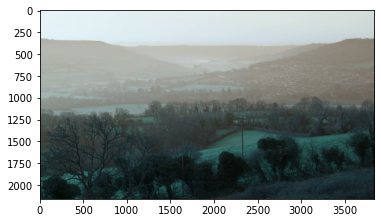

In [64]:
plt.imshow(frame)

In [36]:
# impad = np.pad(frame, ((15//2,15//2), (15,15), (0,0)), 'edge')

In [55]:
# plt.imshow(impad)

In [66]:
oimg = dehaze(frame, 
              config['a'], 
              config['t'], 
              config['rt'], 
              config['tmin'], 
              config['ps'], 
              config['w'], 
              config['px'], 
              config['r'], 
              config['eps'], 
              config['m'])

100%|██████████████████████████████████████████████████████████| 2160/2160 [00:36<00:00, 58.48it/s]


Atmospheric Light estimated.


100%|██████████████████████████████████████████████████████████| 2160/2160 [00:32<00:00, 67.01it/s]


Transmission estimated.


100%|██████████████████████████████████████████████████████████| 2160/2160 [09:30<00:00,  3.78it/s]


Transmission refined.


100%|████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.40it/s]


Radiance recovered.


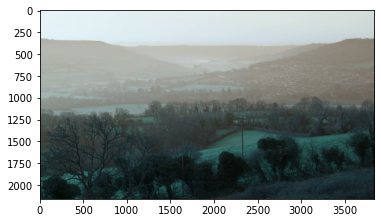

In [67]:
plt.imshow(frame)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


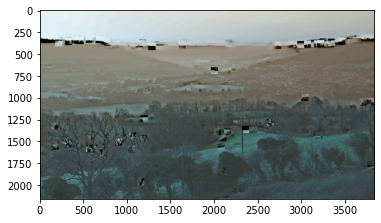

In [68]:
plt.imshow(oimg)